# Crop statistics FAO - All countries
In this notebook we are going to explore, analyse, visualize and do some basic descriptive statistics on the crop production. We have to kind of datasets: 
* the first one contains all data related to crops produced in multiple countries over the years (~1961 to ~2018): for each country we have multiple crops, the surfaces (hectares) covered by those crops when harvested, the yield (kg/ha), and production (tonnes). These number are from the FAO, some the values are etimated, missing or calculated. 
* The second contains data related to population demographic evolution over the years: the evolution of the female population per country, evolution of male and total population. These numbers are also from the FAO the time coverage is 1950 ~ 2100 (prediction). 
For further information about the context please refer to the kaggle Description as it is already well detailled. 

Our job here will be to describe both dataset starting with the crop dataset, then population then combining both:
1. Analyse, Describe and visualize global crop production (per continent and per country). 
2. Analyse, Describe and visualize Cameroon's crops production
3. Compare Cameroon crop's production to the global production ( rest of the countries in Africa and rest of the world)

4. Analyse, Describe and visualize Cameroon's population growth 

6. Analyse and explore the relations between Cameroon's population growth the evolution of it's crop production. 

In [1]:
# Importing (and/or installing) R libraries that we are going to use all along this notebook
options(warn=0) # suppress all warning messages: precaution is adviced because you won't get any warning messages anymore
# to get the warning messages back: options(warn=0)
library(ggplot2) # best R library to create and customize graphs
library(dplyr) # to manipulate the dataframe: filtering, selecting ...
library(countrycode) # to add the continent name to our dataset
library(scales) # axis should not be written in scientific notation: makes it more readable


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
crop_data <- read.csv("../input/crop-statistics-fao-all-countries/Crops_AllData_Normalized.csv") # import and read the crop dataset
crop_data <- crop_data[,c("Area","Item","Element","Year","Unit","Value","Flag")] # keeping only the usefull columns
crop_data$continent <- countrycode(sourcevar = crop_data[, "Area"],
                            origin = "country.name",
                            destination = "continent") # adding the column country name
# the data is mixed: there are countries and continents inside already so we are going to only work with countries first. 
crop_data <- crop_data %>% filter(!is.na(continent)) # keep only countries 
head(crop_data) # printing the 6 first rows 

Warning message in countrycode(sourcevar = crop_data[, "Area"], origin = "country.name", :
“Some values were not matched unambiguously: Africa, Americas, Asia, Australia and New Zealand, Belgium-Luxembourg, Caribbean, Central America, Central Asia, Czechoslovakia, Eastern Africa, Eastern Asia, Eastern Europe, Europe, European Union (27), European Union (28), Land Locked Developing Countries, Least Developed Countries, Low Income Food Deficit Countries, Melanesia, Micronesia, Middle Africa, Net Food Importing Developing Countries, Northern Africa, Northern America, Northern Europe, Oceania, Polynesia, R<e9>union, Serbia and Montenegro, Small Island Developing States, South America, South-eastern Asia, Southern Africa, Southern Asia, Southern Europe, Western Africa, Western Asia, Western Europe, World, Yugoslav SFR
”
Warning message in countrycode(sourcevar = crop_data[, "Area"], origin = "country.name", :
“Some strings were matched more than once, and therefore set to <NA> in the result

,Area,Item,Element,Year,Unit,Value,Flag,continent
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0,F,Asia
2,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900,F,Asia
3,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000,F,Asia
4,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000,F,Asia
5,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000,F,Asia
6,Afghanistan,"Almonds, with shell",Area harvested,1980,ha,5800,F,Asia


In [3]:
# Import and read the population dataset for later use
pop_data <- read.csv("../input/crop-statistics-fao-all-countries/Total_Population_All_Countries.csv")
pop_data <- pop_data[,c(-1,-3,-6)] # keep only the usefull columns
pop_data$continent <- countrycode(sourcevar = pop_data[, "Location"],
                            origin = "country.name",
                            destination = "continent") # adding the column country name
# same as for the crop data: we watn to keep only the countries ... 
pop_data <- pop_data %>% filter(!is.na(continent))
head(pop_data)

Warning message in countrycode(sourcevar = pop_data[, "Location"], origin = "country.name", :
“Some values were not matched unambiguously: Africa, African Group, African Union, African Union: Central Africa, African Union: Eastern Africa, African Union: Northern Africa, African Union: Southern Africa, African Union: Western Africa, African, Caribbean and Pacific (ACP) Group of States, Andean Community, Asia, Asia-Pacific Economic Cooperation (APEC), Asia-Pacific Group, Association of Southeast Asian Nations (ASEAN), Australia/New Zealand, Belt-Road Initiative (BRI), Belt-Road Initiative: Africa, Belt-Road Initiative: Asia, Belt-Road Initiative: Europe, Belt-Road Initiative: Latin America and the Caribbean, Belt-Road Initiative: Pacific, Black Sea Economic Cooperation (BSEC), Bolivarian Alliance for the Americas (ALBA), BRIC, BRICS, Caribbean, Caribbean Community and Common Market (CARICOM), Central America, Central and Southern Asia, Central Asia, Central European Free Trade Agreement 

,Location,Variant,Time,PopMale,PopFemale,PopTotal,PopDensity,continent
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,Medium,1950,4099.243,3652.874,7752.117,11.874,Asia
2,Afghanistan,Medium,1951,4134.756,3705.395,7840.151,12.009,Asia
3,Afghanistan,Medium,1952,4174.450,3761.546,7935.996,12.156,Asia
4,Afghanistan,Medium,1953,4218.336,3821.348,8039.684,12.315,Asia
5,Afghanistan,Medium,1954,4266.484,3884.832,8151.316,12.486,Asia
6,Afghanistan,Medium,1955,4318.945,3952.047,8270.992,12.669,Asia


In [4]:
# group the data per continent and visualize the evolution of each continent
top_n_crop <- 5 # get the top five crops of each continent
crop_continent_data <- crop_data %>% filter(!is.na(Value)) %>% group_by(continent, Item, Element, Year) %>% summarise(Value = sum(Value))
top_crop_continent <- crop_continent_data %>% group_by(continent, Year, Element) %>% top_n(n = top_n_crop, wt = Value) %>% arrange(Year, continent, Element, desc(Value) )  # or each year, get only the top five crops per continent per year 

`summarise()` has grouped output by 'continent', 'Item', 'Element'. You can override using the `.groups` argument.



In [5]:
add_id_column <- function(dataframe, per_country = "continent") {
    # create function to give unique numbers to each grouped elements 
    dataframe$Id <- 1
    for (cpt in 2:nrow(dataframe)) {
        if (dataframe[cpt,per_country] == dataframe[cpt-1,per_country] ) {
            dataframe$Id[cpt] <- dataframe$Id[cpt-1] + 1
        } else {
            dataframe$Id[cpt] <- 1
        }
    }

        return(dataframe)
}

In [6]:
# trying just for the first year: 1961
curr_year <- 1961
year_data <- top_crop_continent %>% filter(Year == curr_year) # should do a loop for every year 

curr_element <- "Yield"; curr_element_unit <- unique(crop_data %>% filter(Element == curr_element) %>% select(,"Unit"))
Element_year_data <- year_data %>% filter(Element == curr_element) # should do a loop for each Element in the dataset
ordered_continents <- Element_year_data %>% group_by(continent,Element, Year) %>% summarise(Value = sum(Value))  %>% arrange( desc(Value)) # get ordered list of top continents crops in the current year
Element_year_data <- Element_year_data %>% mutate( continent = factor(continent, levels = ordered_continents$continent)) %>% arrange(continent) # rearrange by continents producing the most in the current year

Element_year_data <- add_id_column(Element_year_data)
curr_yield_plot <- Element_year_data %>% ggplot(aes(x = continent, y = Value, group = Id )) +
geom_col(aes(color = Item, fill = Item), position = position_dodge(0.8), width = 0.7) +
geom_text( aes(label = Item, group = Id), position = position_dodge(0.8), vjust = 0.5, hjust = "inward", size = 3.5) +
#labs(title = paste("Top 5 crops",curr_element,"per continent in",curr_year), y = paste0(curr_element," (",curr_element_unit,")") , x= "Continents") +
coord_flip() +
theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) +
scale_y_continuous(labels = comma)

#curr_yield_plot

`summarise()` has grouped output by 'continent', 'Element'. You can override using the `.groups` argument.



In [23]:
library(gganimate)
curr_element <- "Yield"; curr_element_unit <- unique(crop_data %>% filter(Element == curr_element) %>% select(,"Unit"))

Element_year_data <- top_crop_continent %>% filter(Element == curr_element) # should do a loop for each Element in the dataset

Element_year_data <- add_id_column(Element_year_data)
tail(Element_year_data)

continent,Item,Element,Year,Value,Id
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Europe,Sugar Crops Primary,Yield,2019,17551487,5
Oceania,Mushrooms and truffles,Yield,2019,5317037,1
Oceania,Tomatoes,Yield,2019,2786316,2
Oceania,Sugar cane,Yield,2019,2448772,3
Oceania,Sugar Crops Primary,Yield,2019,2448772,4
Oceania,"Roots and Tubers, Total",Yield,2019,2118578,5


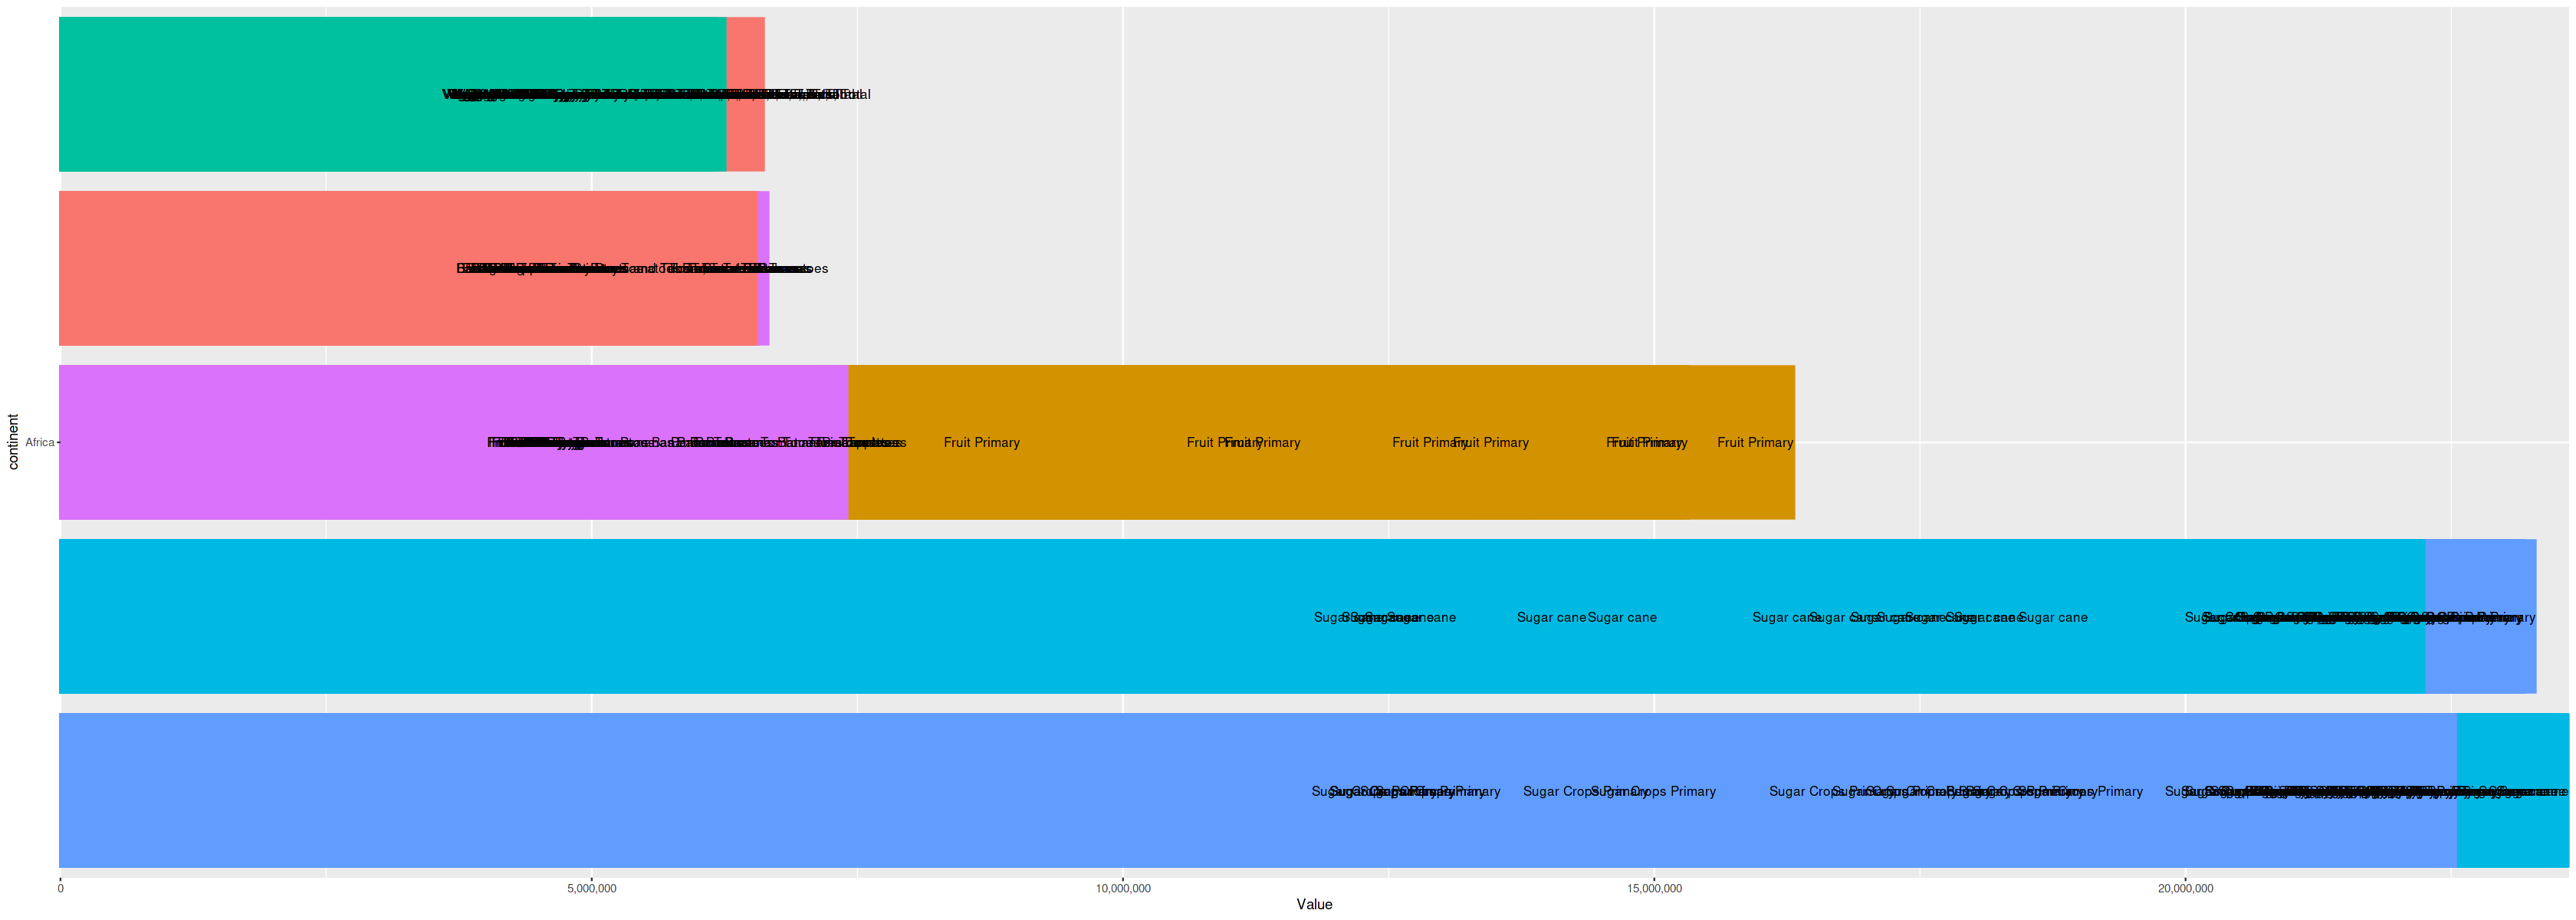

In [38]:
Element_year_data <- Element_year_data %>% filter(continent == "Africa")
curr_yield_plot <- Element_year_data %>% ggplot(aes(x = continent, y = Value, group = Id )) +
geom_col(aes(color = Item, fill = Item), position = position_dodge(0.8), width = 0.7) +
geom_text( aes(label = Item, group = Id), position = position_dodge(0.8), vjust = 0.5, hjust = "inward", size = 3.5) +
#labs(title = paste("Top 5 crops",curr_element,"per continent in",curr_year), y = paste0(curr_element," (",curr_element_unit,")") , x= "Continents") +
coord_flip(clip = "off", expand = FALSE) +
theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) +
scale_y_continuous(labels = comma)  


curr_yield_plot


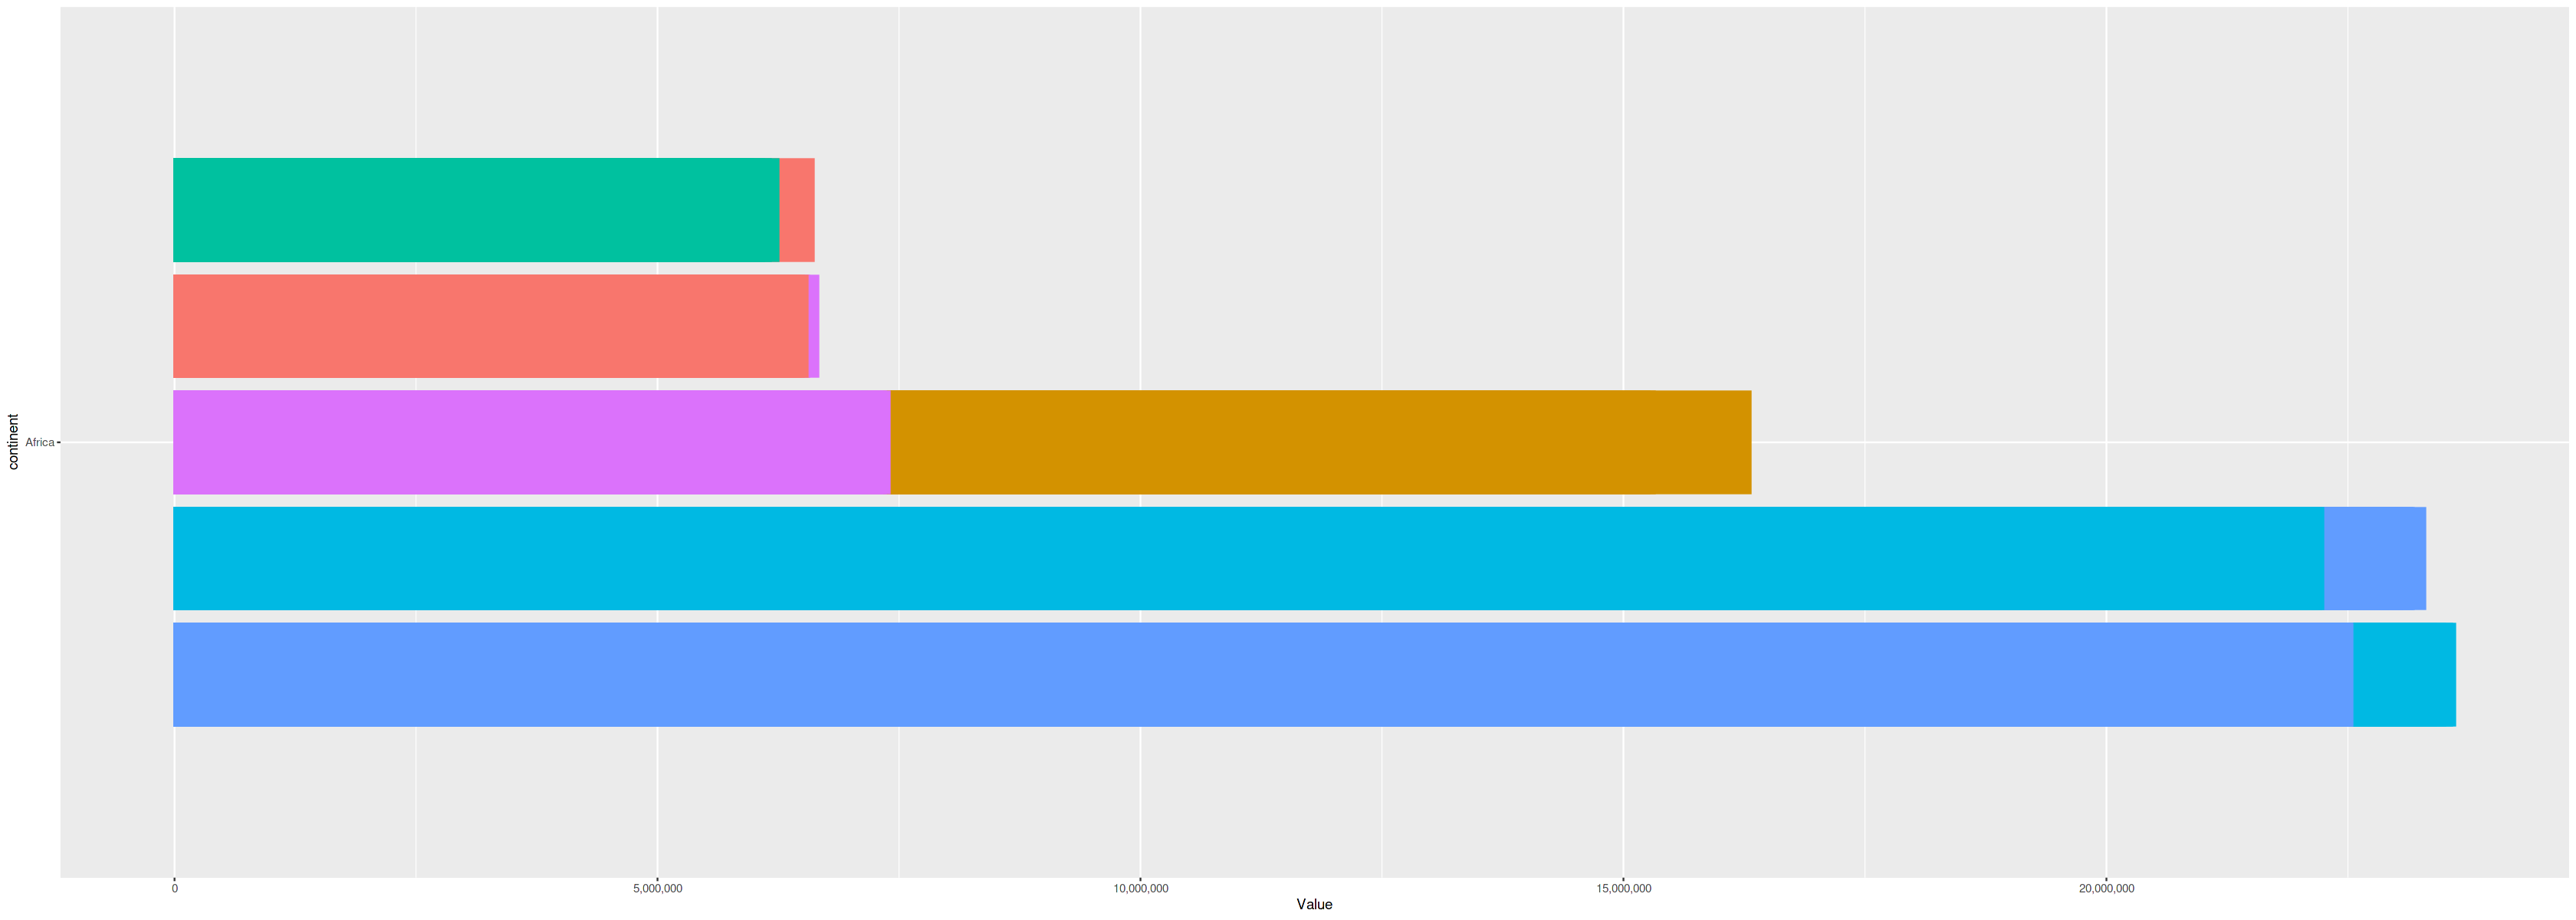

In [28]:
curr_yield_plot

In [41]:
anim <- curr_yield_plot + transition_states(Year, transition_length = 4, state_length = 1) #+ view_follow(fixed_x = TRUE)

In [45]:
animate(anim, 200, fps = 20,  width = 1200, height = 1000,renderer = gifski_renderer("./gganim.gif"))

In [12]:
curr_element <- "Area harvested"; curr_element_unit <- unique(crop_data %>% filter(Element == curr_element) %>% select(,"Unit"))
Element_year_data <- year_data %>% filter(Element == curr_element) # should do a loop for each Element in the dataset
ordered_continents <- Element_year_data %>% group_by(continent,Element, Year) %>% summarise(Value = sum(Value))  %>% arrange( desc(Value)) # get ordered list of top continents crops in the current year
Element_year_data <- Element_year_data %>% mutate( continent = factor(continent, levels = ordered_continents$continent)) %>% arrange(continent) # rearrange by continents producing the most in the current year

Element_year_data <- add_id_column(Element_year_data)
curr_area_plot <- Element_year_data %>% ggplot(aes(x = continent, y = Value, group = Id )) +
geom_col(aes(color = Item, fill = Item), position = position_dodge(0.8), width = 0.7) +
geom_text( aes(label = Item, group = Id), position = position_dodge(0.8), vjust = 0.5, hjust = "inward", size = 3.5) +
labs(title = paste("Top 5 crops",curr_element,"per continent in",curr_year), y = paste0(curr_element," (",curr_element_unit,")") , x= "Continents") +
coord_flip() +
theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) +
scale_y_continuous(labels = comma)

#curr_area_plot

`summarise()` has grouped output by 'continent', 'Element'. You can override using the `.groups` argument.



In [13]:
curr_element <- "Production"; curr_element_unit <- unique(crop_data %>% filter(Element == curr_element) %>% select(,"Unit"))
Element_year_data <- year_data %>% filter(Element == curr_element) # should do a loop for each Element in the dataset
ordered_continents <- Element_year_data %>% group_by(continent,Element, Year) %>% summarise(Value = sum(Value))  %>% arrange( desc(Value)) # get ordered list of top continents crops in the current year
Element_year_data <- Element_year_data %>% mutate( continent = factor(continent, levels = ordered_continents$continent)) %>% arrange(continent) # rearrange by continents producing the most in the current year

Element_year_data <- add_id_column(Element_year_data)
curr_production_plot <- Element_year_data %>% ggplot(aes(x = continent, y = Value, group = Id )) +
geom_col(aes(color = Item, fill = Item), position = position_dodge(0.8), width = 0.7) +
geom_text( aes(label = Item, group = Id), position = position_dodge(0.8), vjust = 0.5, hjust = "inward", size = 3.5) +
labs(title = paste("Top 5 crops",curr_element,"per continent in",curr_year), y = paste0(curr_element," (",curr_element_unit,")") , x= "Continents") +
coord_flip() +
theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) +
scale_y_continuous(labels = comma)

#options(repr.plot.width = 7, repr.plot.height = 7) # default value of height and width are 7,7 inches
#curr_production_plot

`summarise()` has grouped output by 'continent', 'Element'. You can override using the `.groups` argument.



In [14]:
# Multiplot creates a layout structure for multiple plots in one
# window. The function accepts ggplot objects via "..." or as a
# list of objects. Use input "cols" to define the number of
# columns in the plot layout. Alternatively, input "layout" to
# define the row/col matrix of plot elements. If "layout" is
# present, "cols" is ignored. For example, given a layout defined
# by matrix(c(1,2,3,3), nrow=2, byrow=TRUE), then plot #1 goes in
# the upper left, #2 goes in the upper right, and #3 will cross
# the entire bottom row, utilizing both columns.
 
multiplot <- function(..., plotlist = NULL, file, cols = 1, layout = NULL) {
   # launch the grid graphical system
   require(grid)
 
   # make a list from the "..." arguments and/or plotlist
   plots <- c(list(...), plotlist)
   numPlots = length(plots)
 
   # if layout = NULL, then use 'cols' to determine layout
   if (is.null(layout)) {
      # make the panel using ncol; nrow is calculated from ncol
      layout <- matrix(seq(1, cols * ceiling(numPlots/cols)), ncol = cols, nrow = ceiling(numPlots/cols))
   }
 
   if (numPlots==1) {
      print(plots[[1]])
   } else {
      # set up the page
      grid.newpage()
      pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
      # put each plot, in the correct location
      for (i in 1:numPlots) {
         # get the i,j matrix position of the subplot
         matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
         print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row, layout.pos.col = matchidx$col))
      }
   }
}

Loading required package: grid



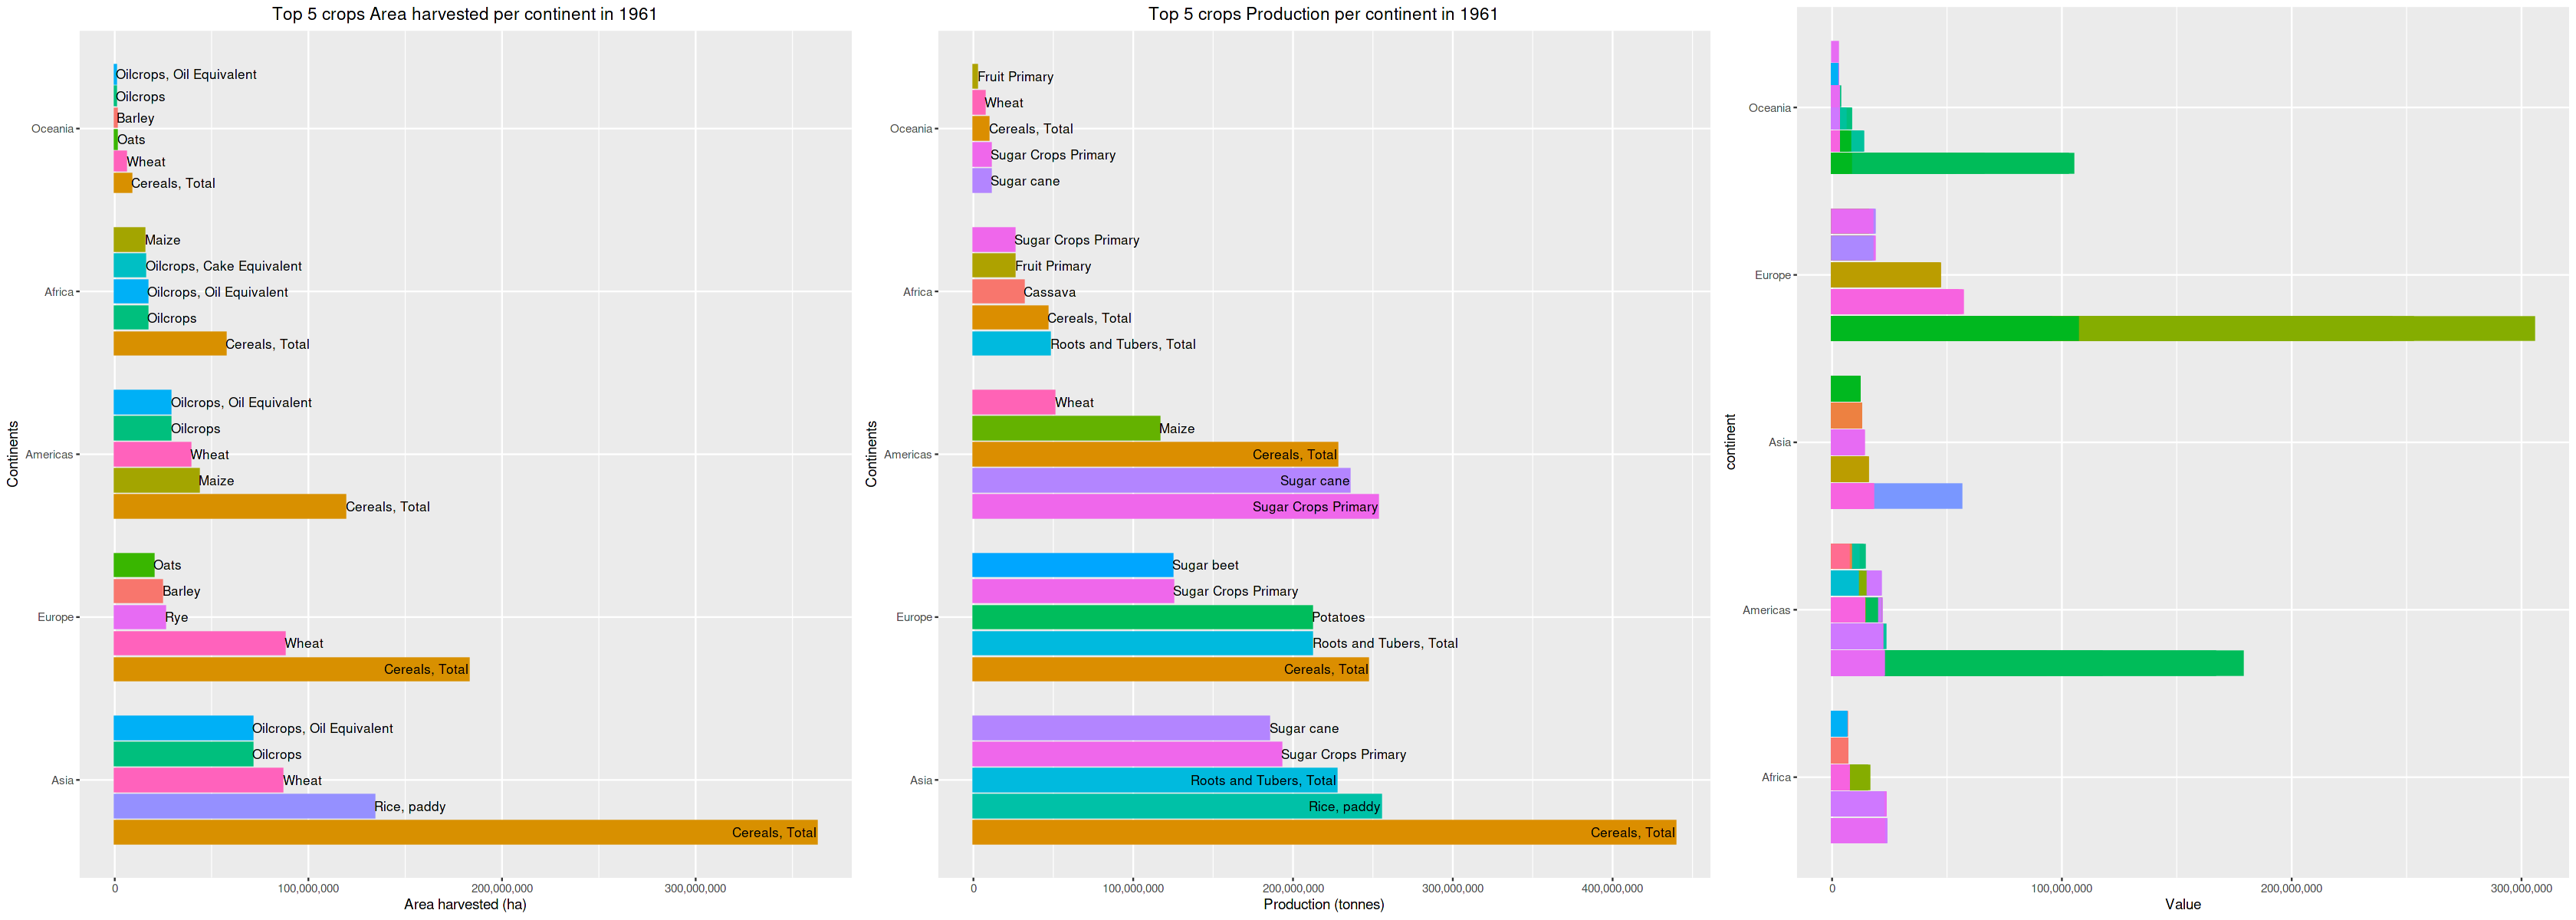

In [15]:
options(repr.plot.width = 28, repr.plot.height = 10) # this is change the shape of the graph: have to do it at every ggplot call 
multiplot(curr_area_plot, curr_production_plot, curr_yield_plot, layout = matrix(c(1,2,3), nrow=1, byrow=TRUE) )

In [16]:
#TODO: next thing to do is to loop over a period of time and then create/generate animation ...